In [10]:
from sklearn.metrics import precision_recall_fscore_support



In [11]:
def calculate_h_score(system_summary, reference_summary):
    # Convert summaries to lowercase for case-insensitive comparison
    system_summary = system_summary.lower()
    reference_summary = reference_summary.lower()

    # Tokenize summaries into words
    system_tokens = set(system_summary.split())
    reference_tokens = set(reference_summary.split())

    # Calculate precision, recall, and F1-score
    precision, recall, _, _ = precision_recall_fscore_support(
        [1 if token in system_tokens else 0 for token in reference_tokens],
        [1] * len(reference_tokens),
        average='binary'
    )

    # Calculate F1-score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score



In [12]:
# Example usage:
text_rank_summary = "With the opening of the Pamban Bridge to the mainland in 1914, however, the businesses failed and the family fortune and properties were lost by the 1920s, apart from the ancestral home. His father Jainulabdeen Marakayar was a boat owner and imam of a local mosque;[9] his mother Ashiamma was a housewife.[10][11][12][13] While Kalam was working on a senior class project, the Dean was dissatisfied with his lack of progress and threatened to revoke his scholarship unless the project was finished within the next three days. The family business had involved trading groceries between the mainland and the island and to and from Sri Lanka, as well as ferrying pilgrims between the mainland and Pamban. Avul Pakir Jainulabdeen Abdul Kalam was born on 15 October 1931, to a Tamil Muslim family in the pilgrimage centre of Rameswaram on Pamban Island, then in the Madras Presidency and now in the State of Tamil Nadu."



In [13]:
freq_summary = "Avul Pakir Jainulabdeen Abdul Kalam was born on 15 October 1931, to a Tamil Muslim family in the pilgrimage centre of Rameswaram on Pamban Island, then in the Madras Presidency and now in the State of Tamil Nadu. After completing his education at Schwartz Higher Secondary School, Ramanathapuram, Kalam went on to attend the St. Joseph's College, Tiruchirappalli from where he graduated in Physics in 1954.[22] Marakayar are a Muslim ethnic group found in coastal Tamil Nadu and Sri Lanka who claim descent from Arab traders and local women. The family business had involved trading groceries between the mainland and the island and to and from Sri Lanka, as well as ferrying pilgrims between the mainland and Pamban. While Kalam was working on a senior class project, the Dean was dissatisfied with his lack of progress and threatened to revoke his scholarship unless the project was finished within the next three days."



In [14]:
reference_summary = "Avul Pakir Jainulabdeen Abdul Kalam, born on October 15, 1931, in Rameswaram, Tamil Nadu, came from a humble background. His father, Jainulabdeen Marakayar, was a boat owner and a local mosque imam, while his mother, Ashiamma, was a housewife. The family's fortunes declined due to the failure of their businesses, leaving them in poverty. Despite financial struggles, Kalam, the youngest of four brothers and one sister, showed determination from a young age, even selling newspapers to contribute to the family income.Kalam, known for his bright and hardworking nature, had an average academic record but excelled in subjects like Mathematics. After completing his education at Schwartz Higher Secondary School and graduating in Physics from St. Joseph's College, Tiruchirappalli, he pursued aerospace engineering at Madras Institute of Technology.During his academic journey, Kalam faced challenges, including a tight deadline for a senior class project. Despite the pressure, he met the deadline impressively, showcasing his resilience. Although he narrowly missed his dream of becoming a fighter pilot, ranking ninth in qualifiers with only eight available positions in the Indian Air Force, Kalam's determination and commitment set the stage for his future achievements."

In [15]:
precision_text_rank, recall_text_rank, f1_score_text_rank = calculate_h_score(text_rank_summary, reference_summary)
precision_freq, recall_freq, f1_score_freq = calculate_h_score(freq_summary, reference_summary)



In [16]:

print("TextRank - Precision:", precision_text_rank)
print("TextRank - Recall:", recall_text_rank)
print("TextRank - F1 Score:", f1_score_text_rank)

print("Frequency-based - Precision:", precision_freq)
print("Frequency-based - Recall:", recall_freq)
print("Frequency-based - F1 Score:", f1_score_freq)

TextRank - Precision: 0.20863309352517986
TextRank - Recall: 1.0
TextRank - F1 Score: 0.34523809523809523
Frequency-based - Precision: 0.2805755395683453
Frequency-based - Recall: 1.0
Frequency-based - F1 Score: 0.4382022471910112


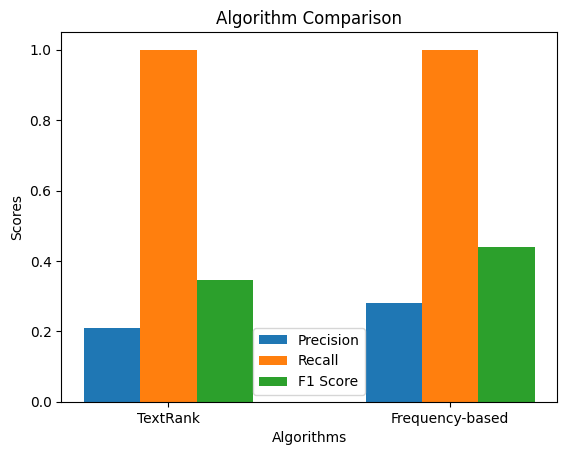

In [17]:
import matplotlib.pyplot as plt

def plot_comparison_bar_chart(algorithm_names, precision_scores, recall_scores, f1_scores, title):
    bar_width = 0.2
    index = range(len(algorithm_names))

    fig, ax = plt.subplots()

    bar1 = ax.bar(index, precision_scores, bar_width, label='Precision')
    bar2 = ax.bar([i + bar_width for i in index], recall_scores, bar_width, label='Recall')
    bar3 = ax.bar([i + 2 * bar_width for i in index], f1_scores, bar_width, label='F1 Score')

    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks([i + bar_width for i in index])
    ax.set_xticklabels(algorithm_names)
    ax.legend()

    plt.show()

# Example usage:
algorithm_names = ['TextRank', 'Frequency-based']
precision_scores = [precision_text_rank, precision_freq]
recall_scores = [recall_text_rank, recall_freq]
f1_scores = [f1_score_text_rank, f1_score_freq]

plot_comparison_bar_chart(algorithm_names, precision_scores, recall_scores, f1_scores, 'Algorithm Comparison')
